## Assignment 2
Pius Carbon \
Student ID 21159062

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import load_data
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Chapter 4

### No. 13

a)

In [62]:
df_weekly = load_data('Weekly')

df_weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [63]:
df_weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


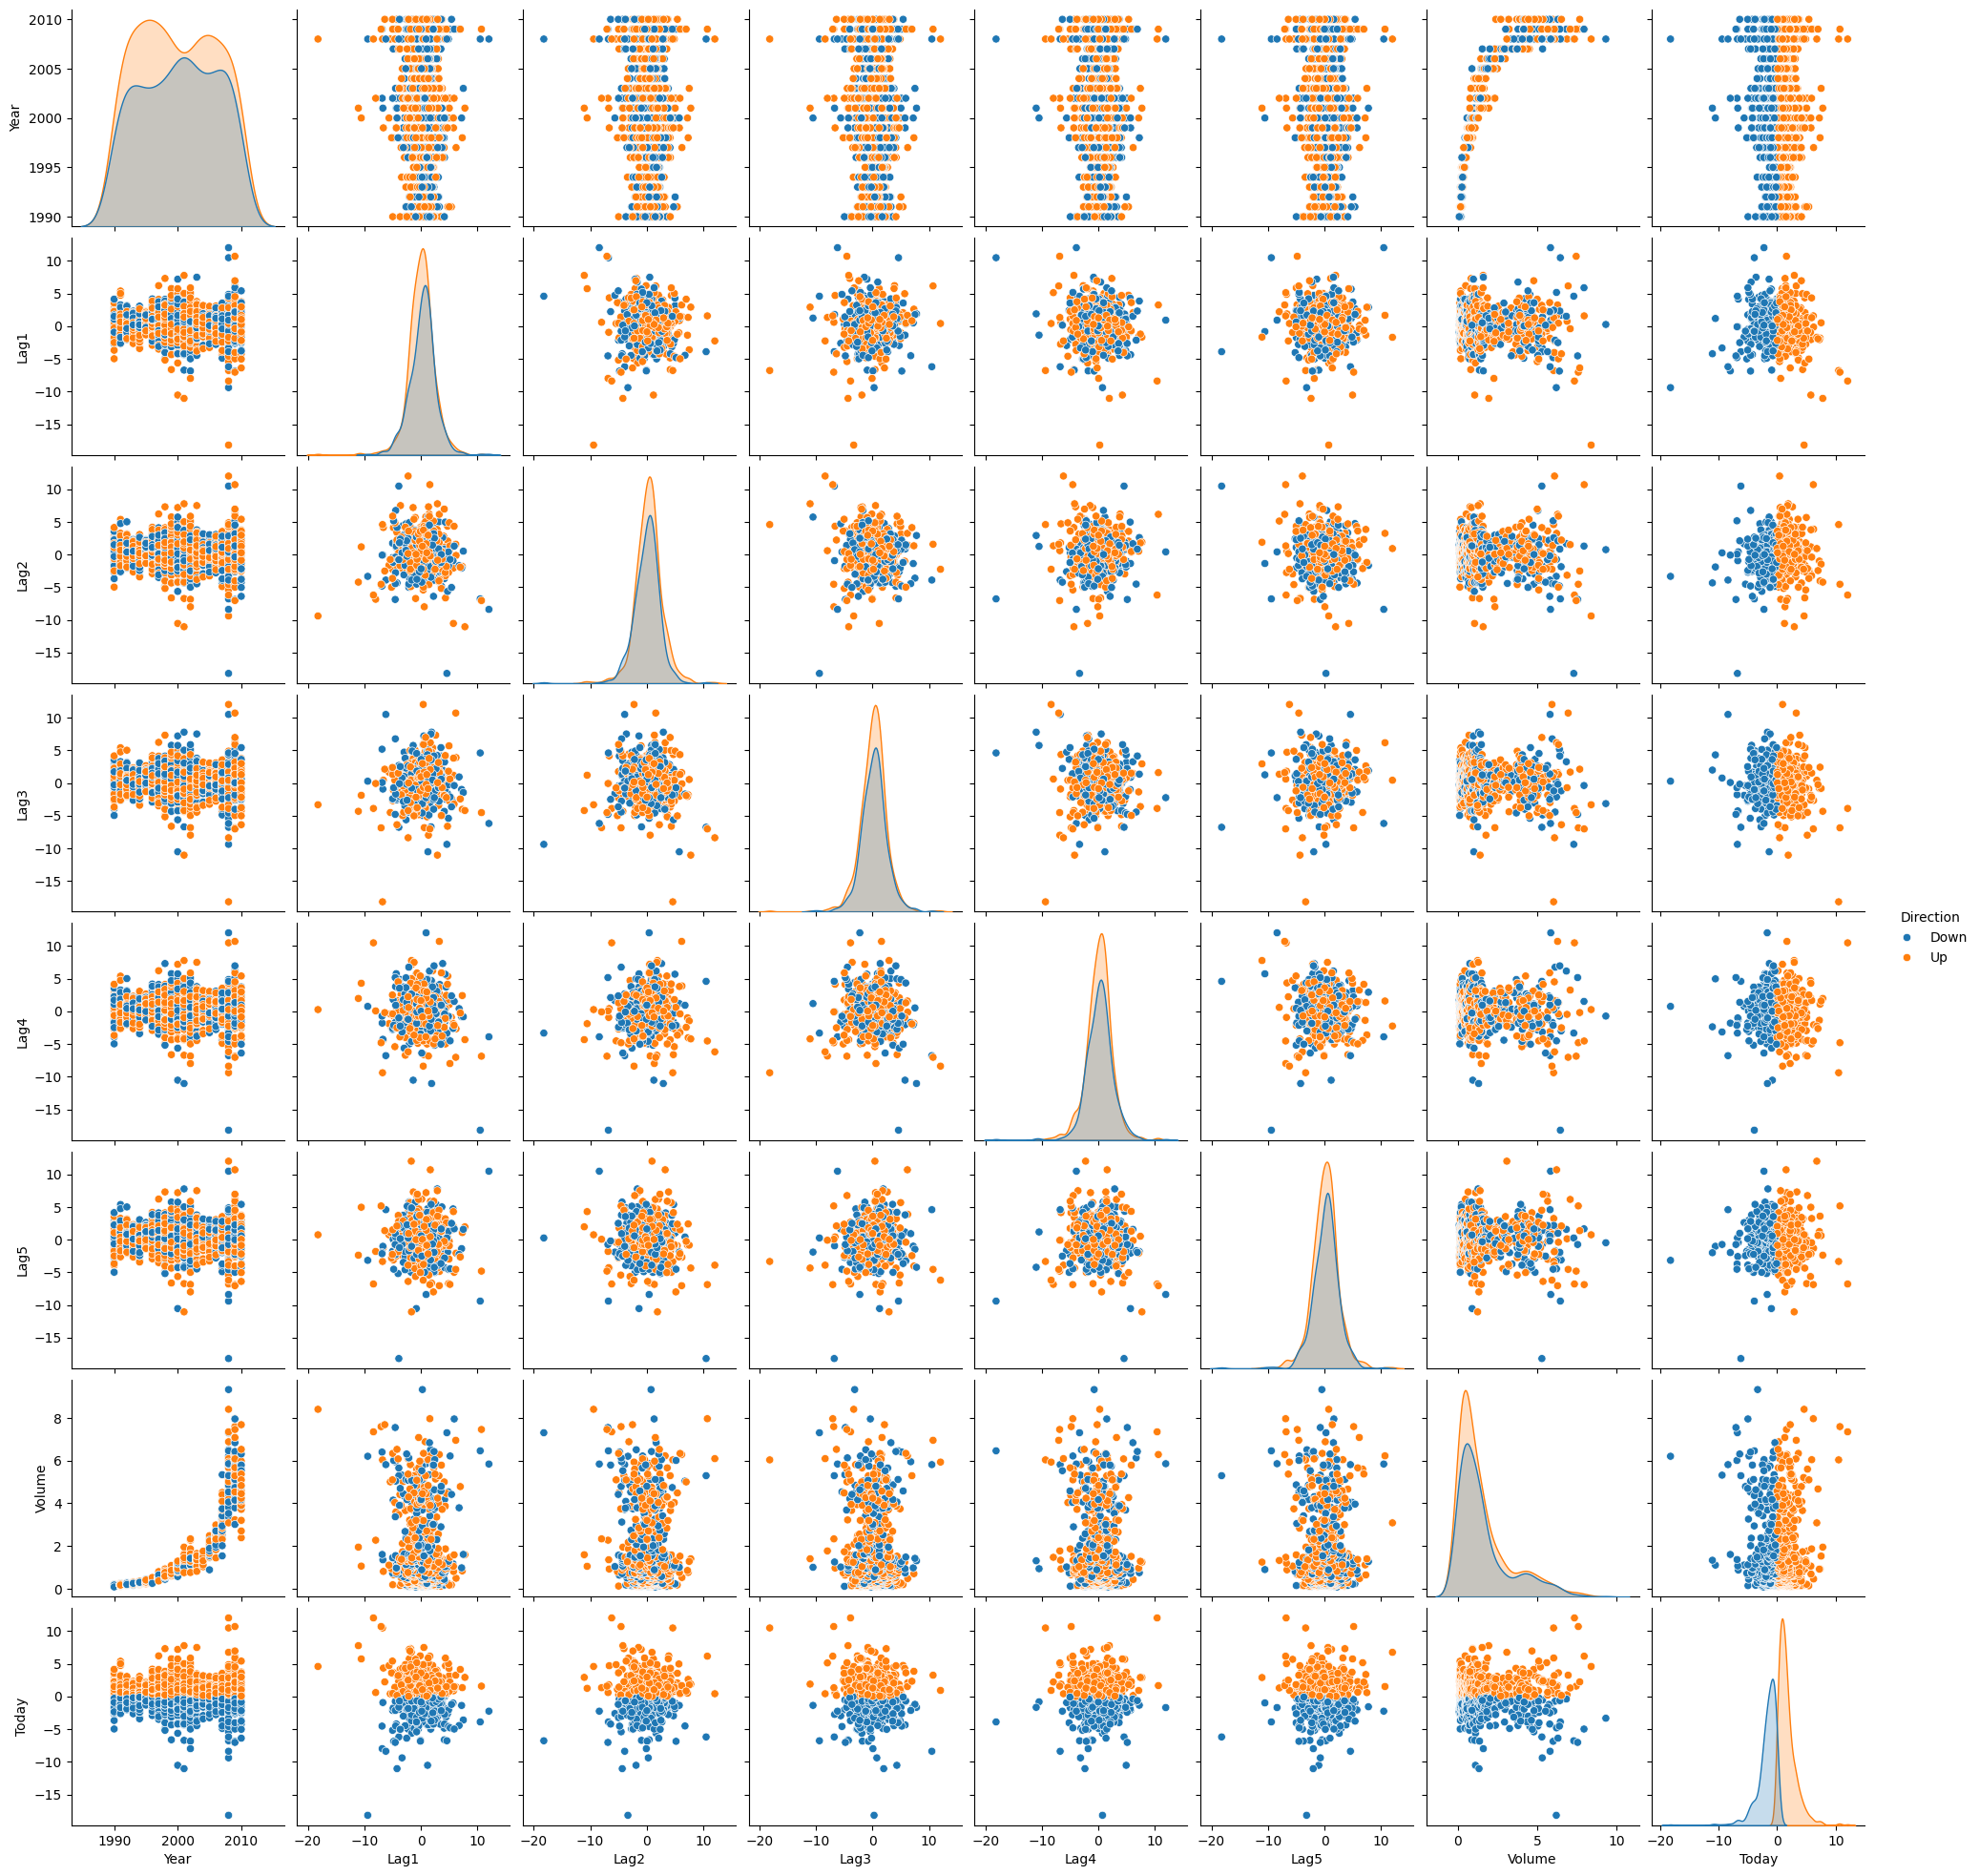

In [64]:
sns.pairplot(df_weekly, hue='Direction')
plt.show()

the data indicates some patterns, e.g. a nonlinear relationship between 'Year' and 'Volume'.

b)

In [65]:
X = df_weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = df_weekly['Direction'].apply(lambda x: 1 if x == 'Up' else 0)

# add constant for intercept
X = sm.add_constant(X)

# fit logistic regression model
log_reg = sm.Logit(y, X)
result = log_reg.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                0.006580
Time:                        23:28:45   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

From the z-values one can see that 'Lag2' seems to be the only statistically significant predictor.

c)

In [66]:
pred_y = result.predict(X)

# convert to binary
pred_y = pred_y.apply(lambda x: 1 if x > 0.5 else 0)

# print confusion matrix
conf_matrix = confusion_matrix(y, pred_y)
print(conf_matrix)

# calculate accuracy
acc = accuracy_score(y, pred_y)
print(f'Accuracy: {acc}')

[[ 54 430]
 [ 48 557]]
Accuracy: 0.5610651974288338


Looking at the confusion matrix we can see that there is a lot of false negatives. This means that the model predicts for a lot of samples 'Direction' == 'Up' while in the dataset their real values are 'Direction' != 'Up'. This influences the overall accuracy negatively.

A confusion matrix is a table used to evaluate the performance of a classification model. It summarizes the results of predictions by comparing them to the actual outcomes.

Key Components: \
True Positives (TP): Correctly predicted positive cases \
True Negatives (TN): Correctly predicted negative cases \
False Positives (FP): Incorrectly predicted positive cases \
False Negatives (FN): Incorrectly predicted negative cases 

A confusion matrix can be helpful in understanding the mistakes made by logistic regression: You can identify if your model tends to miss positive cases (indicated by high FN rate), falsly classifies negative as positives (indicated by high FP rate) and you can look at statistics computed from the TN, TP, FN and FP values: Accuracy, precision, recall, specificity and F1-score depend all on the values of the matrix solely.

d)

In [67]:
# fit training data period 1990-2008 with lag2 only

X_train = X.loc[df_weekly['Year'] < 2009] # we only need the upper bound since the data starts from 1990
X_train = X_train[['Lag2']]
X_train = sm.add_constant(X_train)
y_train = y.loc[df_weekly['Year'] < 2009]


log_reg = sm.Logit(y_train, X_train)
result = log_reg.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                0.003076
Time:                        23:28:45   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                   0.04123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.

In [68]:
# overall fraction of correct predictions for the held out data
X_test = X.loc[df_weekly['Year'] >= 2009]
X_test = X_test[['Lag2']]
X_test = sm.add_constant(X_test)
y_test = y.loc[df_weekly['Year'] >= 2009]

pred_y = result.predict(X_test)
pred_y = pred_y.apply(lambda x: 1 if x > 0.5 else 0)

conf_matrix = confusion_matrix(y_test, pred_y)
print(conf_matrix)

acc = accuracy_score(y_test, pred_y)
print(f'Overall fraction of correct predictions for the held out data: {acc}')

[[ 9 34]
 [ 5 56]]
Overall fraction of correct predictions for the held out data: 0.625


e)

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
pred_y = lda.predict(X_test)

conf_matrix = confusion_matrix(y_test, pred_y)
print(conf_matrix)

lda_acc = accuracy_score(y_test, pred_y)
print(f'Accuracy: {lda_acc}')

[[ 9 34]
 [ 5 56]]
Accuracy: 0.625


f)

In [70]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
pred_y = qda.predict(X_test)

conf_matrix = confusion_matrix(y_test, pred_y)
print(conf_matrix)

qda_acc = accuracy_score(y_test, pred_y)
print(f'Accuracy: {qda_acc}')

[[43  0]
 [61  0]]
Accuracy: 0.41346153846153844


/Users/pius/Library/CloudStorage/OneDrive-TUM/Python/StatML/.conda/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/pius/Library/CloudStorage/OneDrive-TUM/Python/StatML/.conda/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:972: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/pius/Library/CloudStorage/OneDrive-TUM/Python/StatML/.conda/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:972: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/pius/Library/CloudStorage/OneDrive-TUM/Python/StatML/.conda/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:975: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


g)

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

pred_y = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, pred_y)
print(conf_matrix)

knn_acc = accuracy_score(y_test, pred_y)
print(f'Accuracy: {knn_acc}')

[[21 22]
 [30 31]]
Accuracy: 0.5


h)

In [72]:
# using naive bayes

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, nb_pred)
print(conf_matrix)

nb_acc = accuracy_score(y_test, nb_pred)
print(f'Accuracy: {nb_acc}')

[[ 0 43]
 [ 0 61]]
Accuracy: 0.5865384615384616


i)

In [73]:
# compare all methods whichone provides best results

accuracies = [
    ('Logistic Regression', acc),
    ('LDA', lda_acc),
    ('QDA', qda_acc),
    ('KNN', knn_acc),
    ('Naive Bayes', nb_acc)
]

best_method = max(accuracies, key=lambda x: x[1])
print(f'Best method is {best_method[0]} with accuracy {best_method[1]}')

Best method is Logistic Regression with accuracy 0.625


j)

In [74]:
# experiment with different combinations of predictors, transfomrations, interactions
# and so on to see if you can improve the accuracy of the model on the held out data

# create and init multiple models as above
models = [
    ('Logistic Regression', None),
    ('LDA', LinearDiscriminantAnalysis()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('KNN', None),
    ('Naive Bayes', GaussianNB())
]

# create a list of of different datasets using transformations and interactions of predictors
X = df_weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
X = sm.add_constant(X)
X_train = X.loc[df_weekly['Year'] < 2009]

datasets = [
    ('Quadratic terms', X_train.assign(Lag2_2=X_train['Lag2'] ** 2)),
    ('Cubic terms', X_train.assign(Lag2_3=X_train['Lag2'] ** 3)),
    ('Interactions', X_train.assign(Lag2_Lag3=X_train['Lag2'] * X_train['Lag3'])),
    ('All terms', X_train.assign(Lag2_2=X_train['Lag2'] ** 2, Lag2_3=X_train['Lag2'] ** 3, Lag2_Lag3=X_train['Lag2'] * X_train['Lag3']))
]

# train and test all models on all datasets
acc_dict = {}

for model_name, model in models:
    for dataset_name, dataset in datasets:
        if model_name == 'Logistic Regression':
            model = sm.Logit(y_train, dataset)
            model = model.fit()
            pred_y = model.predict(dataset)
            pred_y = pred_y.apply(lambda x: 1 if x > 0.5 else 0)
            acc = accuracy_score(y_train, pred_y)
            conf_matrix = confusion_matrix(y_train, pred_y)
            acc_dict[(model_name, dataset_name)] = (acc, conf_matrix)
        elif model_name == 'KNN':
            for i in range(1, 11):
                model = KNeighborsClassifier(n_neighbors=i)
                model.fit(dataset, y_train)
                pred_y = model.predict(dataset)
                model_name = f'KNN with {i} neighbors'
                acc = accuracy_score(y_train, pred_y)
                conf_matrix = confusion_matrix(y_train, pred_y)
                acc_dict[(model_name, dataset_name)] = (acc, conf_matrix)
        else:
            model.fit(dataset, y_train)
            acc = accuracy_score(y_train, pred_y)
            conf_matrix = confusion_matrix(y_train, pred_y)
            acc_dict[(model_name, dataset_name)] = (acc, conf_matrix)

# print results
for key, value in acc_dict.items():
    print(f'{key[0]} with {key[1]}: accuracy: {value[0]}, confusion matrix: \n {value[1]}', end='\n\n')

# find the best model
best_model = max(acc_dict.items(), key=lambda x: x[1][0])
print(f'Best model is {best_model[0]} with accuracy {best_model[1][0]}')

Optimization terminated successfully.
         Current function value: 0.680689
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681367
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.681354
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.680249
         Iterations 5


/Users/pius/Library/CloudStorage/OneDrive-TUM/Python/StatML/.conda/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/pius/Library/CloudStorage/OneDrive-TUM/Python/StatML/.conda/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/pius/Library/CloudStorage/OneDrive-TUM/Python/StatML/.conda/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/pius/Library/CloudStorage/OneDrive-TUM/Python/StatML/.conda/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Logistic Regression with Quadratic terms: accuracy: 0.5634517766497462, confusion matrix: 
 [[ 81 360]
 [ 70 474]]

Logistic Regression with Cubic terms: accuracy: 0.5644670050761421, confusion matrix: 
 [[ 82 359]
 [ 70 474]]

Logistic Regression with Interactions: accuracy: 0.5644670050761421, confusion matrix: 
 [[ 82 359]
 [ 70 474]]

Logistic Regression with All terms: accuracy: 0.5634517766497462, confusion matrix: 
 [[ 82 359]
 [ 71 473]]

LDA with Quadratic terms: accuracy: 0.5634517766497462, confusion matrix: 
 [[ 82 359]
 [ 71 473]]

LDA with Cubic terms: accuracy: 0.5634517766497462, confusion matrix: 
 [[ 82 359]
 [ 71 473]]

LDA with Interactions: accuracy: 0.5634517766497462, confusion matrix: 
 [[ 82 359]
 [ 71 473]]

LDA with All terms: accuracy: 0.5634517766497462, confusion matrix: 
 [[ 82 359]
 [ 71 473]]

QDA with Quadratic terms: accuracy: 0.5634517766497462, confusion matrix: 
 [[ 82 359]
 [ 71 473]]

QDA with Cubic terms: accuracy: 0.5634517766497462, confusion 

### No. 14

a)

In [75]:
auto = load_data('Auto')
median_mpg = auto['mpg'].median()
auto['mpg01'] = auto['mpg'].apply(lambda x: 1 if x > median_mpg else 0)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0


b)

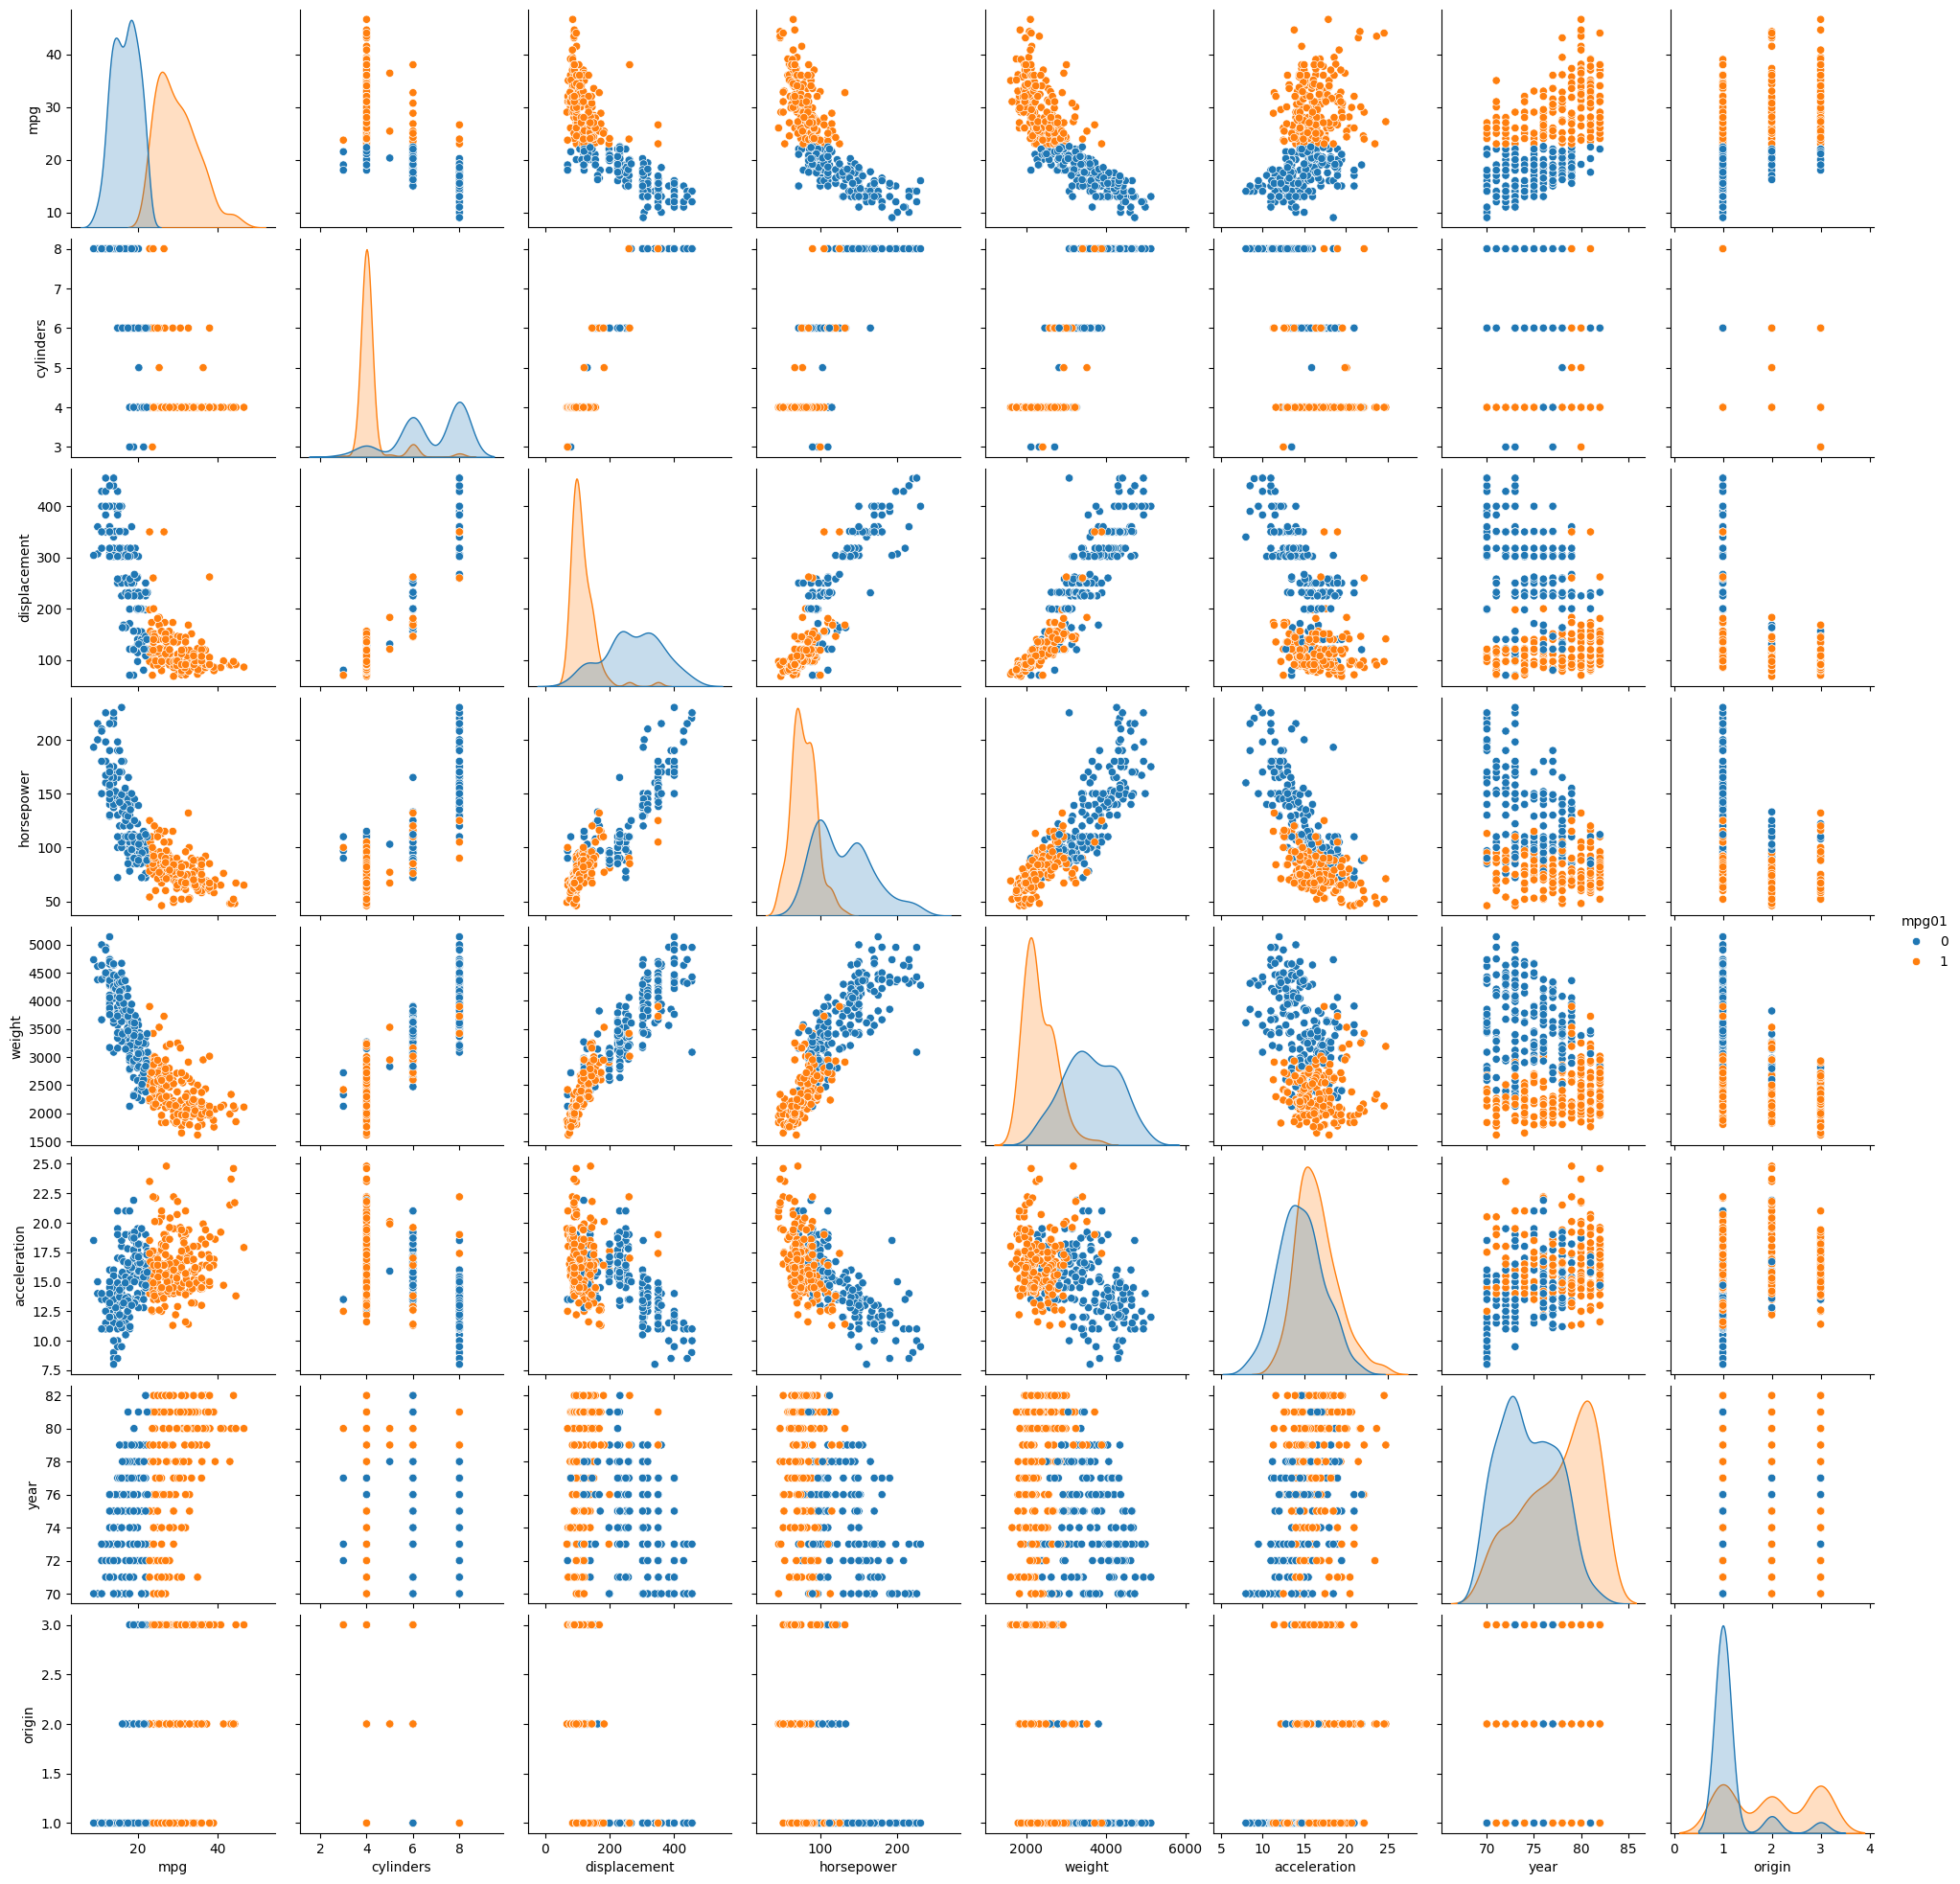

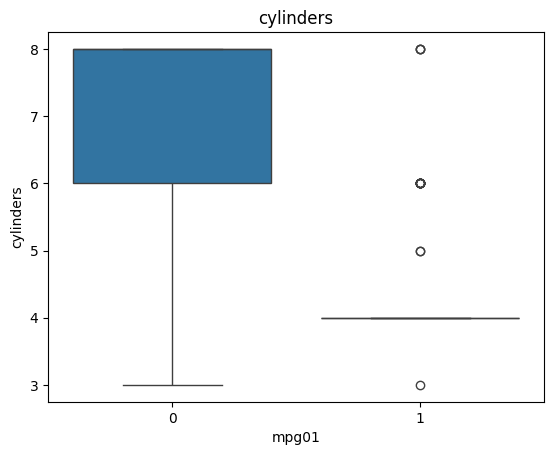

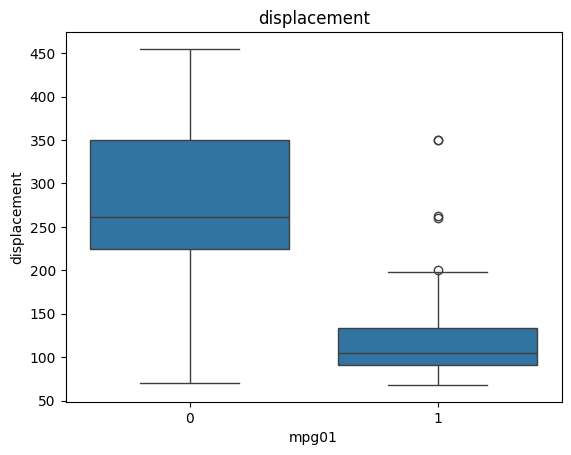

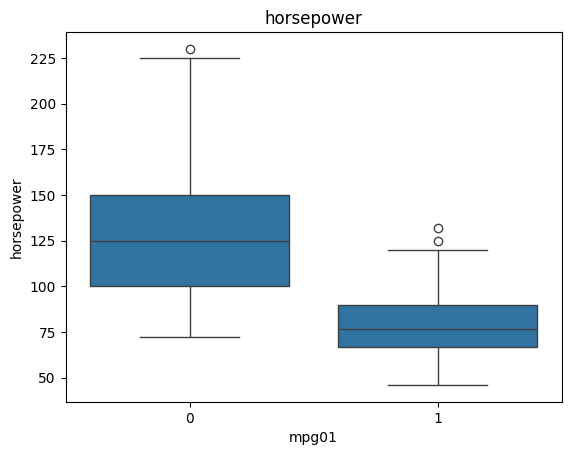

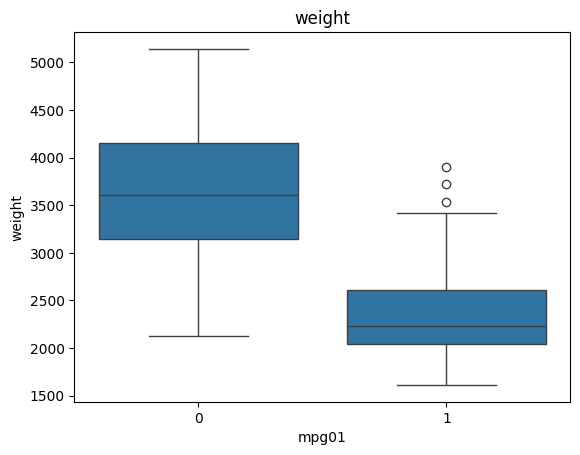

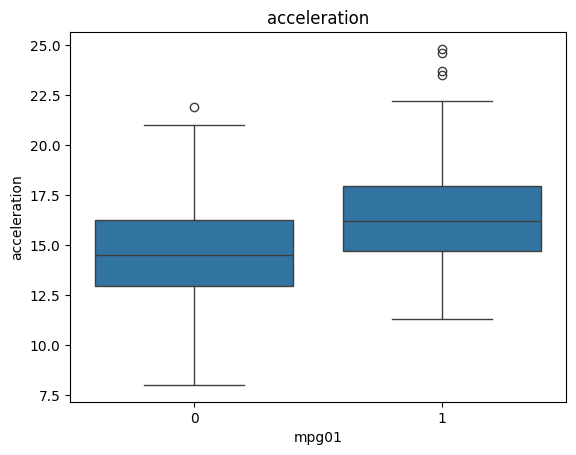

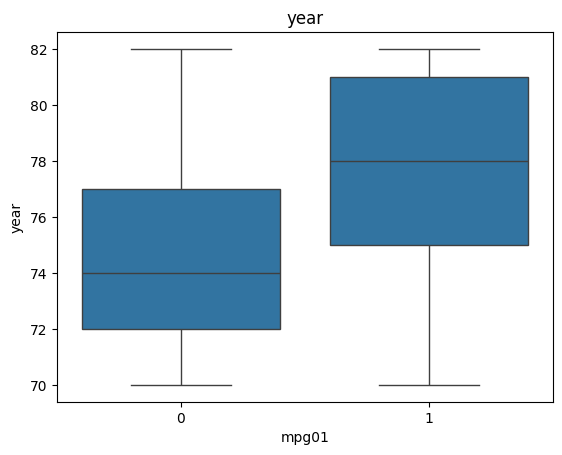

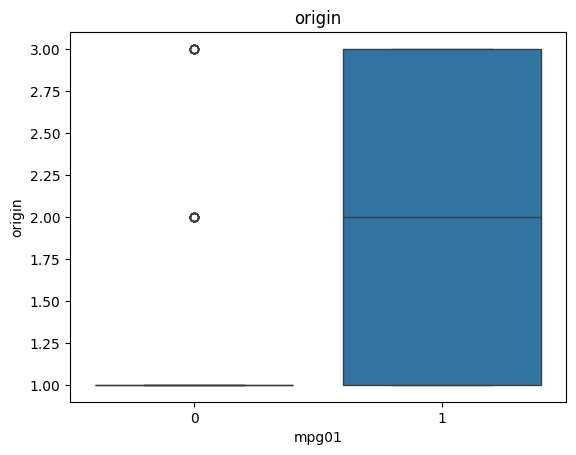

In [76]:
sns.pairplot(auto, hue='mpg01')
plt.show()

predictors = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

for p in predictors:
    sns.boxplot(x='mpg01', y=p, data=auto)
    plt.title(p)
    plt.show()

Findings: by looking at the above plots, it seems like there are some features that seem helpful in predicting 'mpg01': Displacement, horsepower, weight and year since they all have a correlation pattern plotted against 'mpg01' and their distribution is significantly different when comparing them for two values of 'mpg01'.

c)

In [77]:
# train test split
X = auto[predictors]
y = auto['mpg01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

d)

In [78]:
selected_predictors = ['displacement', 'horsepower', 'weight', 'year']

lda = LinearDiscriminantAnalysis()
lda.fit(X_train[selected_predictors], y_train)

pred_y = lda.predict(X_test[selected_predictors])

# confusion matrix
conf_matrix = confusion_matrix(y_test, pred_y)
print(conf_matrix)

# calculate test error
accuracy = accuracy_score(y_test, pred_y)
print(f'Test error: {1-accuracy}')

[[48 11]
 [ 5 66]]
Test error: 0.12307692307692308


e)

In [79]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train[selected_predictors], y_train)

pred_y = qda.predict(X_test[selected_predictors])

# calculate test error
accuracy = accuracy_score(y_test, pred_y)
print(f'Test error: {1-accuracy}')

Test error: 0.12307692307692308


f)

In [80]:
log_reg = sm.Logit(y_train, sm.add_constant(X_train[selected_predictors]))
result = log_reg.fit()

pred_y = result.predict(sm.add_constant(X_test[selected_predictors])).apply(lambda x: 1 if x > 0.5 else 0)

accuracy = accuracy_score(y_test, pred_y)
print(f'Test error: {1-accuracy}')

Optimization terminated successfully.
         Current function value: 0.193074
         Iterations 9
Test error: 0.1384615384615384


g)

In [81]:
nb = GaussianNB()
nb.fit(X_train[selected_predictors], y_train)

pred_y = nb.predict(X_test[selected_predictors])

accuracy = accuracy_score(y_test, pred_y)
print(f'Test error: {1-accuracy}')

Test error: 0.10769230769230764


h)

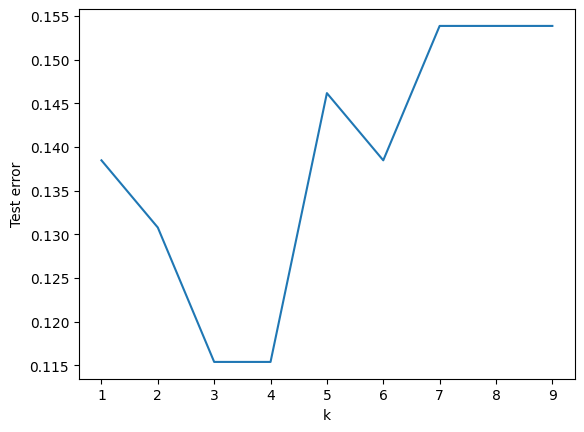

In [82]:
k_values = range(1, 10)
errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[selected_predictors], y_train)
    pred_y = knn.predict(X_test[selected_predictors])
    errors.append(1 - accuracy_score(y_test, pred_y))

plt.plot(k_values, errors)
plt.xlabel('k')
plt.ylabel('Test error')
plt.show()

In [83]:
for k, error in zip(k_values, errors):
    print(f'k={k}, error={error}')
print('')

best_k = k_values[np.argmin(errors)]
print(f'The best k is k={best_k} with an error of {min(errors)}')

k=1, error=0.1384615384615384
k=2, error=0.13076923076923075
k=3, error=0.11538461538461542
k=4, error=0.11538461538461542
k=5, error=0.1461538461538462
k=6, error=0.1384615384615384
k=7, error=0.15384615384615385
k=8, error=0.15384615384615385
k=9, error=0.15384615384615385

The best k is k=3 with an error of 0.11538461538461542


## Chapter 5

### No. 2

g)

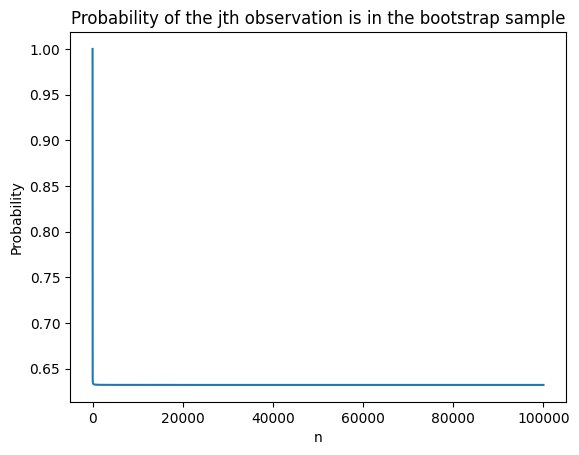

In [84]:
n = range(1, 100000)
probabilities = [1 - (1 - 1/n_i) ** n_i for n_i in n]

plt.plot(n, probabilities)
plt.xlabel('n')
plt.ylabel('Probability')
plt.title('Probability of the jth observation is in the bootstrap sample')
plt.show()

Findings: as n increases, the probability that the jth observation is included converges towards 1-1/e which is about 0.632. The convergence is very fast for small n and can be interpreted as that for large n, each observation has a chance of 63.2 percent to be included in the bootstrap sample

h)

In [85]:
n = 100
no_bootstraps = 10000
jth_observation = 4

store = np.empty(no_bootstraps)
for i in range(no_bootstraps):
    sample = np.random.choice(np.arange(n), size=n, replace=True)
    store[i] = jth_observation in sample

print('Estimated probability:', np.mean(store))

Estimated probability: 0.6326


Comment on the result: the estimated probability gets close to the theoretical probabability established as 1-1/e confirming the bound in g)

### No. 5

a)

In [86]:
np.random.seed(42)
random_seed = 42

In [87]:
default = load_data('Default')

X = default[['balance', 'income']]
y = default['default'].apply(lambda x: 1 if x == 'Yes' else 0)

log_reg = sm.Logit(y, sm.add_constant(X))
result = log_reg.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                  0.4594
Time:                        23:28:53   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0

b)

In [88]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_seed)

mul_log_reg = sm.MNLogit(y_train, sm.add_constant(X_train))
result = mul_log_reg.fit()

print(result.summary())

pred_y = result.predict(sm.add_constant(X_test)).idxmax(axis=1)

conf_matrix = confusion_matrix(y_test, pred_y)
print(conf_matrix)

accuracy = accuracy_score(y_test, pred_y)
print(f'Validation set error: {1-accuracy}') 


Optimization terminated successfully.
         Current function value: 0.076170
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:                default   No. Observations:                 6700
Model:                        MNLogit   Df Residuals:                     6697
Method:                           MLE   Df Model:                            2
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                  0.4782
Time:                        23:28:53   Log-Likelihood:                -510.34
converged:                       True   LL-Null:                       -978.05
Covariance Type:            nonrobust   LLR p-value:                7.514e-204
 default=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.8071      0.551    -21.417      0.000     -12.888     -10.727
balance        0.0059      0

c)

In [89]:
test_sizes = [0.25, 0.4, 0.5]

acc_scores = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

    mul_log_reg = sm.MNLogit(y_train, sm.add_constant(X_train))
    result = mul_log_reg.fit()

    print(result.summary())

    pred_y = result.predict(sm.add_constant(X_test)).idxmax(axis=1)

    conf_matrix = confusion_matrix(y_test, pred_y)
    print(conf_matrix)

    accuracy = accuracy_score(y_test, pred_y)
    acc_scores.append(accuracy)
    print(f'Validation set error: {1-accuracy}') 


Optimization terminated successfully.
         Current function value: 0.078251
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:                default   No. Observations:                 7500
Model:                        MNLogit   Df Residuals:                     7497
Method:                           MLE   Df Model:                            2
Date:                Mon, 28 Oct 2024   Pseudo R-squ.:                  0.4678
Time:                        23:28:54   Log-Likelihood:                -586.88
converged:                       True   LL-Null:                       -1102.8
Covariance Type:            nonrobust   LLR p-value:                8.620e-225
 default=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5392      0.505    -22.857      0.000     -12.529     -10.550
balance        0.0057      0

Comment on results: the validation set error stays almost constant for different sizes of the test set.

d)

In [90]:
default['student_dummy'] = default['student'].apply(lambda x: 1 if x == 'Yes' else 0)

misclassification_errors_student = []

for i in range(3):
    train, test = train_test_split(default, test_size=0.3, stratify=default['default'], random_state=i)
    X_train = train[['income', 'balance', 'student_dummy']]
    
    y_train = train['default'].apply(lambda x: 1 if x == 'Yes' else 0)
    X_train = sm.add_constant(X_train)

    log_def_student = sm.Logit(y_train, X_train).fit(disp=0)

    X_test = test[['income', 'balance', 'student_dummy']]
    X_test = sm.add_constant(X_test)
    test_pred_proba_student = log_def_student.predict(X_test)

    test_pred_student = np.where(test_pred_proba_student > 0.5, 'Yes', 'No')

    y_test = test['default'].apply(lambda x: 'Yes' if x == 1 else 'No')

    misclassification_error_student = np.mean(y_test != test_pred_student)
    misclassification_errors_student.append(misclassification_error_student)

average_error_student = np.mean(misclassification_errors_student)
print(f"\nAverage Misclassification Error with student dummy over three splits: {average_error_student:.5f}")

# Compare with previous model
print(f"\nAverage Misclassification Error without student over three splits: {1-np.mean(acc_scores):.5f}")


Average Misclassification Error with student dummy over three splits: 0.01689

Average Misclassification Error without student over three splits: 0.02688


So including a dummy variable leads indeed to a reduction in the test error.

## No. 6

a)

In [91]:
X = default[['balance', 'income']]
X = sm.add_constant(X)
y = default['default'].apply(lambda x: 1 if x == 'Yes' else 0)

model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Mon, 28 Oct 2024   Deviance:                       1579.0
Time:                        23:28:54   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.0

b)

In [92]:
def boot_fn(data, index):
    boot_data = data.iloc[index]
    X_boot = boot_data[['balance', 'income']]
    X_boot = sm.add_constant(X_boot)
    y_boot = boot_data['default'].apply(lambda x: 1 if x == 'Yes' else 0)

    model_boot = sm.GLM(y_boot, X_boot, family=sm.families.Binomial())
    result_boot = model_boot.fit()

    return result_boot.params

c)

In [93]:
n_bootstraps = 1000
boot_coefs = np.zeros((n_bootstraps, 3))

for i in range(n_bootstraps):
    boot_indices = np.random.choice(default.index, size=len(default), replace=True)
    boot_coefs[i] = boot_fn(default, boot_indices)

boot_se = boot_coefs.std(axis=0)
print(f"Bootstrap Standard Errors:\nIntercept: {boot_se[0]:.4f}, Income: {boot_se[1]:.4f}, Balance: {boot_se[2]:.4f}")

Bootstrap Standard Errors:
Intercept: 0.4345, Income: 0.0002, Balance: 0.0000


d)

In [94]:
print(f"GLM Standard Errors:\n{result.bse}")

GLM Standard Errors:
const      0.434772
balance    0.000227
income     0.000005
dtype: float64


Comment on the results: Both results are very similar which underlines the correctness of our approach. The GLM standard errors are based on asymptotic theory while the bootstrap standard errors are obtained empirically from resampling.